In [2]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import tensorflow as tf

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load testing data

In [3]:
features=pd.read_csv('Data/features_test.csv',index_col=0)
target=pd.read_csv('Data/target_test.csv',index_col=0)['ERed']

In [4]:
features_std = StandardScaler().fit_transform(features)

In [170]:
def test_plot(data):
    df_l=pd.DataFrame({'True':target,'Model':data})
    g=sns.jointplot(df_l,x='True',y='Model', kind="scatter", color="#4CB391")
    g.fig.set_size_inches((4,4))
    llim,ulim=0.8,2
    plt.plot([llim,ulim],[llim,ulim],c='k',ls='--',alpha=0.3)
    plt.xlim([llim,ulim])
    plt.ylim([llim,ulim])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('True',fontsize=14)
    plt.ylabel('Model',fontsize=14)
    plt.text(1,1.9,'MAE = '+str(np.round(mean_absolute_error(target,data),5)*1000)+' meV')
    plt.text(1,1.8,'R$^2$ = '+str(np.round(r2_score(target,data),3)))
    plt.show()

## Load pre-trained linear model and test model on unseen data

In [171]:
lr_model = pickle.load(open('Models/LinearRegression.sav', 'rb'))
t_linear=lr_model.predict(features_std)

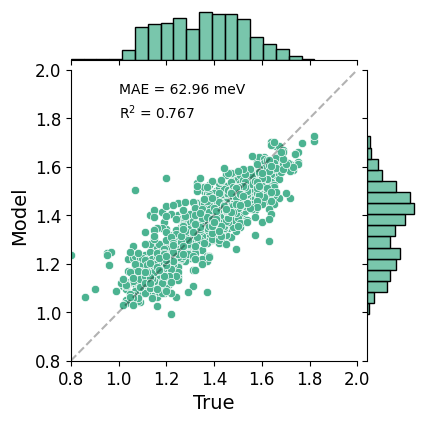

In [172]:
test_plot(t_linear)

## Load pre-trained GBR model and test model on unseen data

In [173]:
gbr_model = pickle.load(open('Models/EnsembleGBR.sav', 'rb'))
t_gbr=gbr_model.predict(features_std)

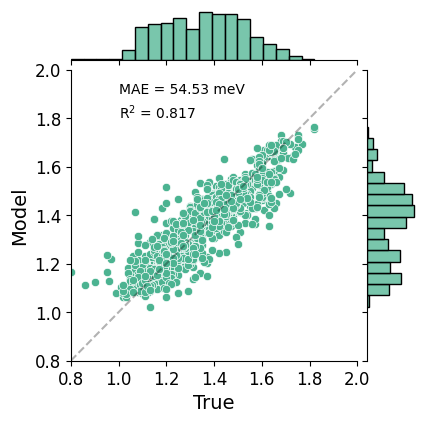

In [174]:
test_plot(t_gbr)

## Load pre-trained NN model and test model on unseen data

In [180]:
NN_model = tf.keras.models.load_model('Models/NN_model/')
t_NN=NN_model.predict(features_std)
t_NN=t_NN.flatten()

35/35 [==============================] - 0s 2ms/step


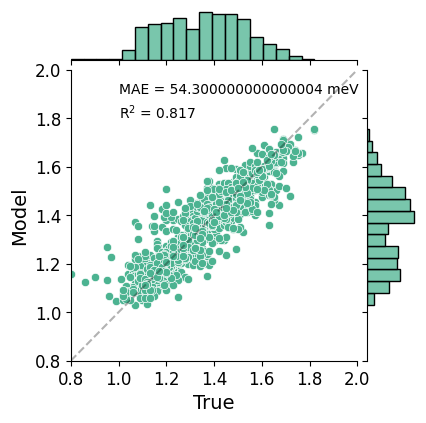

In [177]:
test_plot(t_NN)

## Final comparison

In [37]:
features_train=pd.read_csv('Data/features_train.csv',index_col=0)
target_train=pd.read_csv('Data/target_train.csv',index_col=0)['ERed']
features_train_std = StandardScaler().fit_transform(features_train)

In [43]:
train_linear=lr_model.predict(features_train_std)
train_gbr=gbr_model.predict(features_train_std)
train_NN=NN_model.predict(features_train_std)
train_NN=train_NN.flatten()

137/137 [==============================] - 0s 2ms/step


In [44]:
lin_train_mae=np.round(mean_absolute_error(target_train,train_linear),3)*1000
lin_train_r2=np.round(r2_score(target_train,train_linear),3)
lin_test_mae=np.round(mean_absolute_error(target,t_linear),3)*1000
lin_test_r2=np.round(r2_score(target,t_linear),3)

In [45]:
gbr_train_mae=np.round(mean_absolute_error(target_train,train_gbr),3)*1000
gbr_train_r2=np.round(r2_score(target_train,train_gbr),3)
gbr_test_mae=np.round(mean_absolute_error(target,t_gbr),3)*1000
gbr_test_r2=np.round(r2_score(target,t_gbr),3)

In [46]:
nn_train_mae=np.round(mean_absolute_error(target_train,train_NN),3)*1000
nn_train_r2=np.round(r2_score(target_train,train_NN),3)
nn_test_mae=np.round(mean_absolute_error(target,t_NN),3)*1000
nn_test_r2=np.round(r2_score(target,t_NN),3)

## Organise error metrics into dataframe

In [118]:
df=pd.DataFrame({'Model':['LR','GBR','NN'],
              'Train':[lin_train_mae,gbr_train_mae,nn_train_mae],
              'Train':[lin_train_r2,gbr_train_r2,nn_train_r2],
              'Test':[lin_test_mae,gbr_test_mae,nn_test_mae],
              'Test':[lin_test_r2,gbr_test_r2,nn_test_r2]})

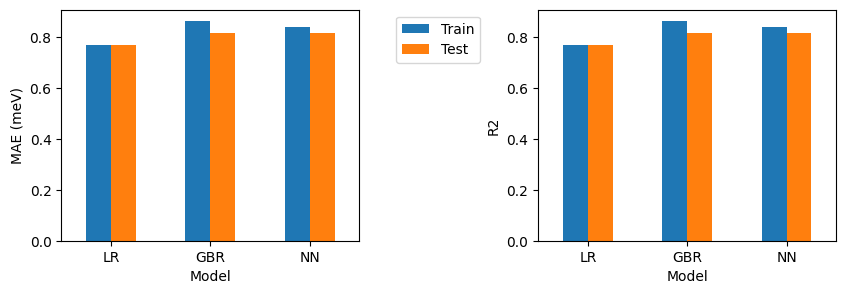

In [127]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,3))
df[['Model','Train','Test']].set_index('Model').plot(kind='bar', rot=0,ax=ax1)
ax1.set_ylabel('MAE (meV)')
ax1.legend(bbox_to_anchor=(1.1, 1))
df[['Model','Train','Test']].set_index('Model').plot(kind='bar', rot=0,ax=ax2,legend=None)
ax2.set_ylabel('R2')
plt.subplots_adjust(wspace=0.6)
plt.show()